# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score,confusion_matrix 
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPool1D,Flatten
from keras.optimizers import adam

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Loading Dataset

In [4]:
df = pd.read_excel('LDD.xlsx',header=None,names=['Age','Gender','FPG','Diastolic BP','Systolic BP','BMI','Average Blood Sugar','Waist Circumference','Hip Circumference','Cholesterol','Famiy History','OGTT','Output'])

In [5]:
df.head()

,Age,Gender,FPG,Diastolic BP,Systolic BP,BMI,Average Blood Sugar,Waist Circumference,Hip Circumference,Cholesterol,Famiy History,OGTT,Output
0,50,5,170,80,130,23.108435,6.1,61,100,260,2,305,tested_positive
1,65,4,165,80,140,21.612812,8.2,58,59,182,2,290,tested_positive
2,50,5,101,80,120,21.000730,5.4,84,90,220,3,240,tested_positive
3,55,5,225,90,130,24.843435,5.2,92,105,280,2,340,tested_positive
4,47,5,96,90,140,20.957171,7.6,85,99,226,3,220,tested_positive


# Checking for class imbalance

In [5]:
df.groupby('Output').count()

,Age,Gender,FPG,Diastolic BP,Systolic BP,BMI,Average Blood Sugar,Waist Circumference,Hip Circumference,Cholesterol,Famiy History,OGTT
Output,,,,,,,,,,,,
tested_negative,305,305,305,305,305,305,305,305,305,305,305,305
tested_positive,753,753,753,753,753,753,753,753,753,753,753,753


As we can see, class imbalance ratio is 7:3(approx.). In real-world data this ratio would be fair-enough and will not cause any heavy baisness. Although there are techniques which are used to deal with this problem.

1) Up-Sampling : Increases minority class by adding dummy data


2) Down-Sampling : Decreases majority class


3) SMOTE : Increases minority class by adding synthetic data

# Insights of Input Attributes by making paiplot

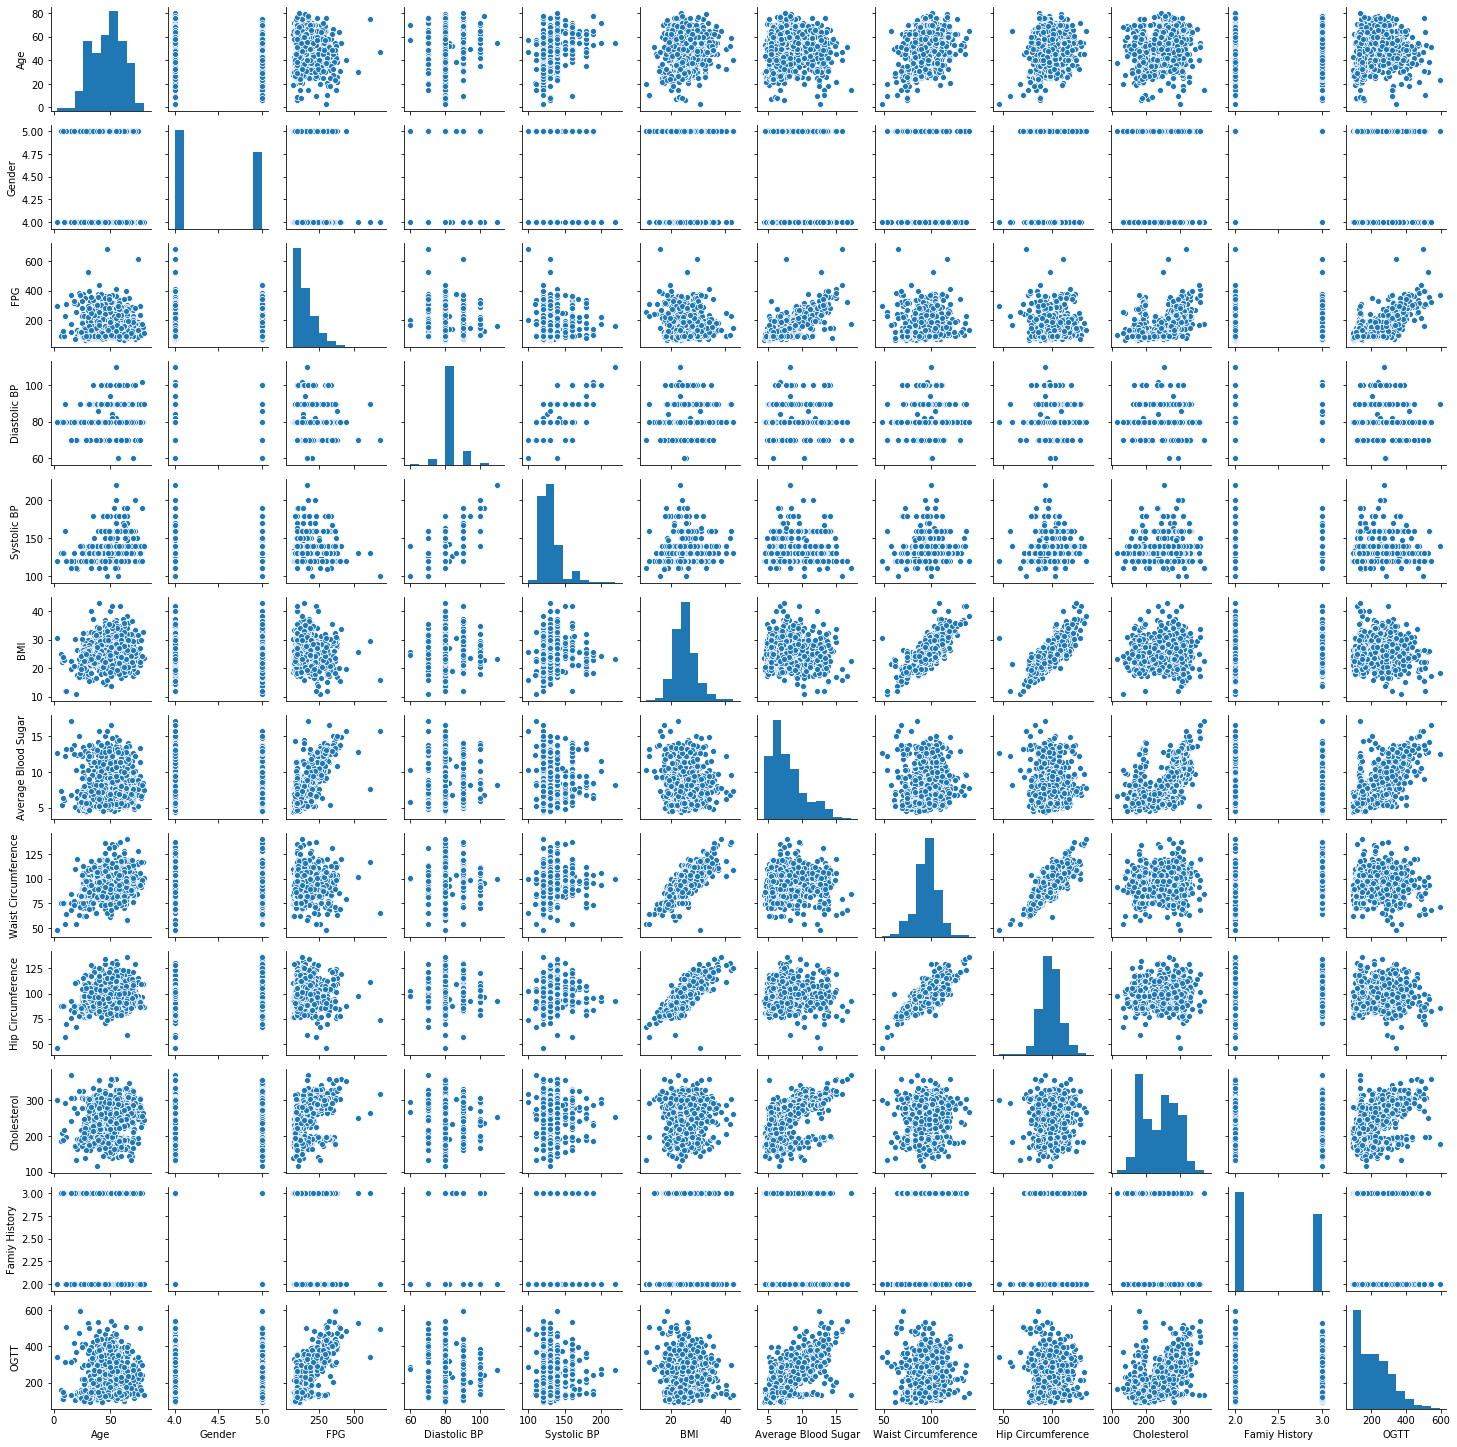

In [7]:
sns.pairplot(df).fig.set_size_inches(20,20)

1) Since we see Linearity in FPG, OGTT, Average Blood Sugar and BMI, Waist Circumference and Hip Circumference therefore they are highly co-related and to avoid multi-colinearity we will consider only one attribute from each.

2) From this plot, we also get to know that we have 2 categorical attribute i.e Gender and Family History.

# Filtered Dataframe

In [6]:
filtered_df = df.drop(columns = ['Average Blood Sugar','OGTT','Hip Circumference','Waist Circumference'])

In [7]:
filtered_df.head()

,Age,Gender,FPG,Diastolic BP,Systolic BP,BMI,Cholesterol,Famiy History,Output
0,50,5,170,80,130,23.108435,260,2,tested_positive
1,65,4,165,80,140,21.612812,182,2,tested_positive
2,50,5,101,80,120,21.000730,220,3,tested_positive
3,55,5,225,90,130,24.843435,280,2,tested_positive
4,47,5,96,90,140,20.957171,226,3,tested_positive


# Input Features and Output Feature

In [9]:
input_features = filtered_df[filtered_df.columns[:-1]].values
output_feature = df['Output'].values

# Dealing with string variable

In [10]:
le = LabelEncoder()
output_feature = le.fit_transform(output_feature)

# Dealing with Categorical variables

In [11]:
one_h_input = OneHotEncoder(categorical_features=[1,7])
input_features = one_h_input.fit_transform(input_features).toarray()

/home/nakul/env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nakul/env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Splitting the Dataset

In [12]:
x_train,x_test,y_train,y_test = tts(input_features,output_feature,test_size = 0.2,random_state = 42)

# Logistic Regression

In [160]:
model_lr = LogisticRegression(solver='lbfgs',max_iter=1000,random_state=0)

In [161]:
model_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
pred1 = model1.predict_proba(x_test)[:,1]

# ROC Curve

In [163]:
fpr,tpr,thre = roc_curve(y_test,pred1)

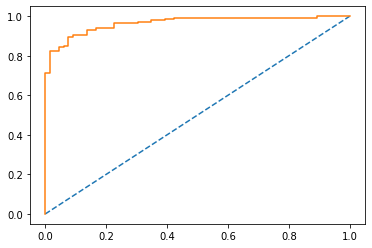

In [164]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

Since our curve is above the base line, therefore we can conclude that our model has learned nicely.

# Confusion Metrics

In [250]:
confusion_matrix(y_test,model_lr.predict(x_test))

array([[ 52,  14],
       [  9, 137]])

# Accuracy

In [185]:
(137+52)/(52+14+9+137)

0.8915094339622641

# KNN

In [167]:
model_knn = KNeighborsClassifier()

In [168]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [174]:
pred2 = model_knn.predict_proba(x_test)[:,1]

# ROC Curve

In [175]:
fpr,tpr,thre = roc_curve(y_test,pred2)

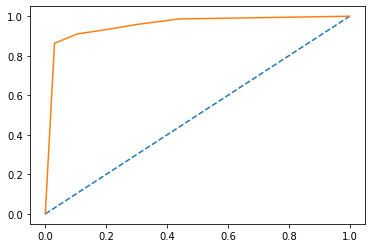

In [179]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

Since our curve is above the base line, therefore we can conclude that our model has learned nicely.

# Confusion Metrics

In [188]:
confusion_matrix(y_test,model_knn.predict(x_test))

array([[ 53,  13],
       [ 10, 136]])

# Accuracy

In [189]:
(136+53)/(53+13+10+136)

0.8915094339622641

# SVC

In [217]:
model_svc = SVC(gamma = 'auto',probability=True)

In [218]:
model_svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [219]:
pred3 = model_svc.predict_proba(x_test)[:,1]

# ROC Curve

In [197]:
fpr,tpr,thre = roc_curve(y_test,pred3)

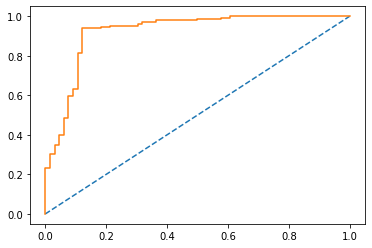

In [198]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

Since our curve is above the base line, therefore we can conclude that our model has learned nicely.

# Confusion Metrics

In [233]:
confusion_matrix(y_test,model_svc.predict(x_test))

array([[ 18,  48],
       [  0, 146]])

# Accuracy

In [201]:
(146+18)/(18+48+0+146)

0.7735849056603774

# Naive Bayes

In [202]:
model_nb = GaussianNB()

In [203]:
model_nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [208]:
pred4 = model_nb.predict_proba(y_test.reshape((-1,1)))[:,1]

# ROC Curve

In [228]:
fpr,tpr,thre = roc_curve(y_test,pred4)

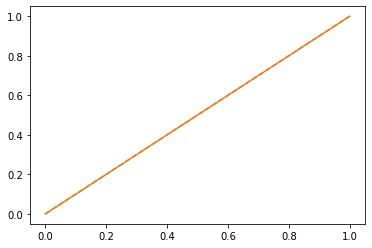

In [229]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

Our model failed to learned.

In [227]:
confusion_matrix(y_test,model_nb.predict(y_test.reshape((-1,1))))

array([[  0,  66],
       [  0, 146]])

# Accuracy

In [234]:
(146+0)/(0+66+0+146)

0.6886792452830188

# Decision Tree

In [254]:
model_dc = DecisionTreeClassifier()

In [255]:
model_dc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [345]:
pred5 = model_dc.predict_proba(x_test)[:,1]

# ROC Curve

In [347]:
fpr,tpr,thre = roc_curve(y_test,pred5)

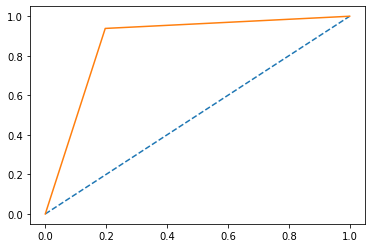

In [348]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

Our model has learned nicely

# Confusion Metrics

In [260]:
confusion_matrix(y_test,model_dc.predict(x_test))

array([[ 53,  13],
       [  9, 137]])

# Accuracy

In [262]:
(53+137)/(53+13+9+137)

0.8962264150943396

# Random Forest

In [160]:
# df.drop(columns='Output',inplace = True)
x1_train,x1_test,y1_train,y1_test = tts(df,output_feature,test_size = 0.2)

/home/nakul/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 11 (0.216677)
2. feature 0 (0.197748)
3. feature 9 (0.191867)
4. feature 2 (0.158212)
5. feature 6 (0.104683)
6. feature 4 (0.047775)
7. feature 7 (0.030479)
8. feature 5 (0.029739)
9. feature 8 (0.016252)
10. feature 3 (0.002521)


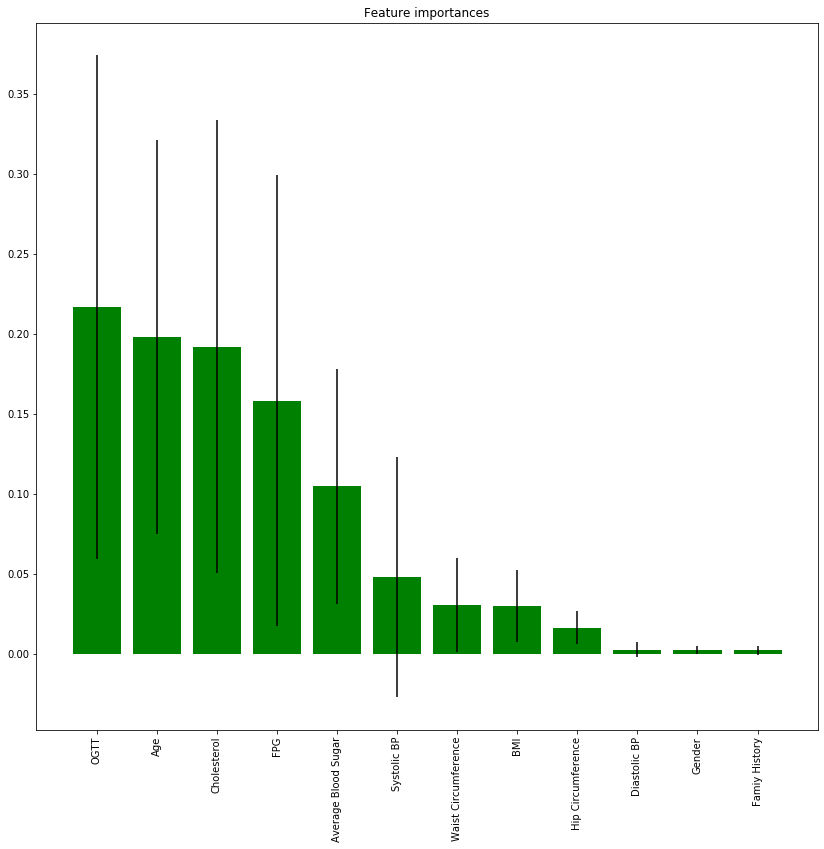

In [163]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x1_train,y1_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x1_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x1_train.shape[1]), x1_train.columns[indices],rotation=90)
plt.xlim([-1, x1_train.shape[1]])
plt.show()

In [62]:
model_rfc = RandomForestClassifier(n_estimators=200,random_state = 0)

In [63]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
pred6 = model_rfc.predict_proba(x_test)[:,1]

# ROC Curve

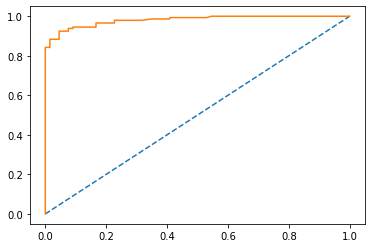

In [65]:
fpr,tpr,thre = roc_curve(y_test,pred6)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

Our model has learned nicely.

# Confusion Metrics

In [70]:
confusion_matrix(y_test,model_rfc.predict(x_test))

array([[ 55,  11],
       [  7, 139]])

# Accuracy

In [288]:
(55+139)/(55+11+7+139)

0.9150943396226415

# XGBoost

In [151]:
model_xgb = XGBClassifier(n_estimators=147,learning_rate=0.001)

In [152]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=147, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [155]:
model_xgb.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.08324994,
       0.39979526, 0.        , 0.        , 0.        , 0.5169548 ],
      dtype=float32)

In [331]:
pred7 = model_xgb.predict_proba(x_test)[:,1]

# ROC Curve

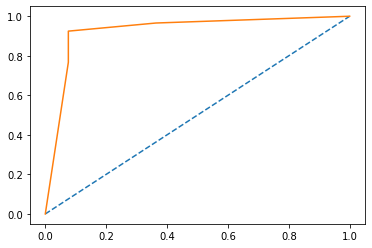

In [332]:
fpr,tpr,thre = roc_curve(y_test,pred7)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)

This curves proves that our model has learned well enough.

# Confusion Metrics

In [333]:
confusion_matrix(y_test,model_xgb.predict(x_test))

array([[ 61,   5],
       [ 11, 135]])

# Accuracy

In [334]:
(61+135)/(61+5+11+135)

0.9245283018867925

# Artificial Neural Network

In [17]:
from keras.callbacks import LearningRateScheduler
import math

In [134]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.1
    epochs_drop = 20.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    print(lrate)
    return lrate

In [145]:
model_ann = Sequential()
model_ann.add(Dense(units = 8,input_dim = 10,activation = 'relu'))
model_ann.add(Dense(units = 8,activation = 'relu'))
model_ann.add(Dense(units = 16,activation = 'relu'))
model_ann.add(Dense(units = 32,activation = 'relu'))
model_ann.add(Dense(units = 1,activation = 'sigmoid'))

In [146]:
model_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [147]:
model_ann.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=8,callbacks=[LearningRateScheduler(step_decay)])

Train on 846 samples, validate on 212 samples
Epoch 1/100
0.001
846/846 [==============================] - 3s 4ms/step - loss: 0.7440 - acc: 0.7139 - val_loss: 0.4074 - val_acc: 0.6934
Epoch 2/100
0.001
846/846 [==============================] - 0s 368us/step - loss: 0.3498 - acc: 0.8251 - val_loss: 0.3294 - val_acc: 0.8443
Epoch 3/100
0.001
846/846 [==============================] - 0s 368us/step - loss: 0.3128 - acc: 0.8452 - val_loss: 0.3340 - val_acc: 0.8255
Epoch 4/100
0.001
846/846 [==============================] - 0s 372us/step - loss: 0.2910 - acc: 0.8700 - val_loss: 0.3193 - val_acc: 0.8585
Epoch 5/100
0.001
846/846 [==============================] - 0s 346us/step - loss: 0.2522 - acc: 0.8901 - val_loss: 0.2918 - val_acc: 0.8491
Epoch 6/100
0.001
846/846 [==============================] - 0s 335us/step - loss: 0.2597 - acc: 0.8901 - val_loss: 0.2903 - val_acc: 0.8585
Epoch 7/100
0.001
846/846 [==============================] - 0s 372us/step - loss: 0.2349 - acc: 0.9007 - val_

846/846 [==============================] - 0s 332us/step - loss: 0.1870 - acc: 0.9173 - val_loss: 0.2763 - val_acc: 0.8774
Epoch 57/100
1.0000000000000003e-05
846/846 [==============================] - 0s 324us/step - loss: 0.1871 - acc: 0.9161 - val_loss: 0.2765 - val_acc: 0.8774
Epoch 58/100
1.0000000000000003e-05
846/846 [==============================] - 0s 328us/step - loss: 0.1871 - acc: 0.9173 - val_loss: 0.2771 - val_acc: 0.8774
Epoch 59/100
1.0000000000000003e-05
846/846 [==============================] - 0s 398us/step - loss: 0.1871 - acc: 0.9161 - val_loss: 0.2761 - val_acc: 0.8774
Epoch 60/100
1.0000000000000002e-06
846/846 [==============================] - 0s 339us/step - loss: 0.1866 - acc: 0.9161 - val_loss: 0.2762 - val_acc: 0.8774
Epoch 61/100
1.0000000000000002e-06
846/846 [==============================] - 0s 424us/step - loss: 0.1866 - acc: 0.9161 - val_loss: 0.2763 - val_acc: 0.8774
Epoch 62/100
1.0000000000000002e-06
846/846 [==============================] - 0s 

In [148]:
model_ann.evaluate(x_test,y_test)

212/212 [==============================] - 0s 63us/step


[0.27697173941810177, 0.8773584928152696]

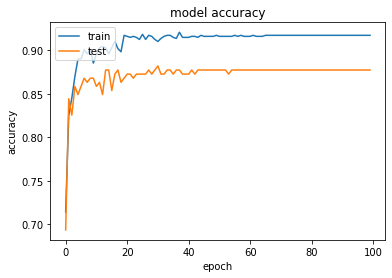

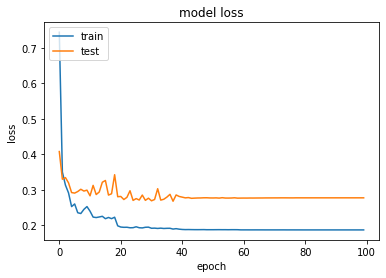

In [149]:
# summarize history for accuracy
plt.plot(model_ann.history.history['acc'])
plt.plot(model_ann.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_ann.history.history['loss'])
plt.plot(model_ann.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Convolutional Neural Network

In [438]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters = 32,kernel_size = 2,input_shape = (10,1),activation = 'relu'))
model_cnn.add(Conv1D(filters = 32,kernel_size = 2,activation = 'relu'))
model_cnn.add(MaxPool1D(2))
model_cnn.add(Conv1D(filters = 64,kernel_size = 2,activation = 'relu'))
model_cnn.add(Conv1D(filters = 64,kernel_size = 2,activation = 'relu'))
model_cnn.add(MaxPool1D(2))
model_cnn.add(Flatten())

In [439]:
model_cnn.add(Dense(32,activation = 'relu'))
model_cnn.add(Dense(32,activation = 'relu'))
model_cnn.add(Dense(64,activation = 'relu'))
model_cnn.add(Dense(1,activation = 'sigmoid'))

In [440]:
model_cnn.compile(optimizer=adam(lr = 0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [444]:
model_cnn.fit(np.expand_dims(x_train,-1),np.expand_dims(y_train,-1),epochs=100,validation_data=(np.expand_dims(x_test,-1),np.expand_dims(y_test,-1)),batch_size=16)

Train on 846 samples, validate on 212 samples
Epoch 1/100
846/846 [==============================] - 2s 2ms/step - loss: 0.5290 - acc: 0.6915 - val_loss: 0.4319 - val_acc: 0.6934
Epoch 2/100
846/846 [==============================] - 0s 198us/step - loss: 0.3915 - acc: 0.7908 - val_loss: 0.3764 - val_acc: 0.7594
Epoch 3/100
846/846 [==============================] - 0s 184us/step - loss: 0.3447 - acc: 0.8558 - val_loss: 0.3278 - val_acc: 0.8538
Epoch 4/100
846/846 [==============================] - 0s 186us/step - loss: 0.3022 - acc: 0.8735 - val_loss: 0.2934 - val_acc: 0.8821
Epoch 5/100
846/846 [==============================] - 0s 199us/step - loss: 0.2684 - acc: 0.8960 - val_loss: 0.2754 - val_acc: 0.8821
Epoch 6/100
846/846 [==============================] - 0s 182us/step - loss: 0.2446 - acc: 0.8960 - val_loss: 0.3103 - val_acc: 0.8585
Epoch 7/100
846/846 [==============================] - 0s 190us/step - loss: 0.2450 - acc: 0.9019 - val_loss: 0.2617 - val_acc: 0.8774
Epoch 8/100

Epoch 61/100
846/846 [==============================] - 0s 177us/step - loss: 0.1737 - acc: 0.9208 - val_loss: 0.2210 - val_acc: 0.8915
Epoch 62/100
846/846 [==============================] - 0s 171us/step - loss: 0.1720 - acc: 0.9208 - val_loss: 0.2590 - val_acc: 0.8868
Epoch 63/100
846/846 [==============================] - 0s 212us/step - loss: 0.1735 - acc: 0.9220 - val_loss: 0.2369 - val_acc: 0.8962
Epoch 64/100
846/846 [==============================] - 0s 234us/step - loss: 0.1709 - acc: 0.9173 - val_loss: 0.2206 - val_acc: 0.8915
Epoch 65/100
846/846 [==============================] - 0s 181us/step - loss: 0.1790 - acc: 0.9161 - val_loss: 0.2356 - val_acc: 0.8915
Epoch 66/100
846/846 [==============================] - 0s 177us/step - loss: 0.1723 - acc: 0.9279 - val_loss: 0.2506 - val_acc: 0.8915
Epoch 67/100
846/846 [==============================] - 0s 183us/step - loss: 0.1755 - acc: 0.9208 - val_loss: 0.2321 - val_acc: 0.8962
Epoch 68/100
846/846 [==========================

In [445]:
model_cnn.evaluate(np.expand_dims(x_test,-1),np.expand_dims(y_test,-1))

212/212 [==============================] - 0s 1ms/step


[0.23569287781445486, 0.900943398475647]

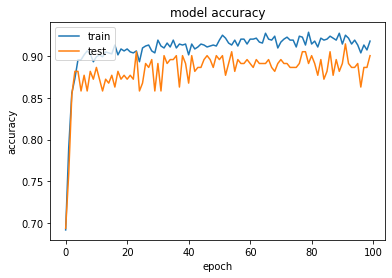

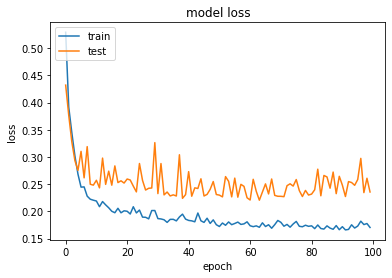

In [446]:
# summarize history for accuracy
plt.plot(model_cnn.history.history['acc'])
plt.plot(model_cnn.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_cnn.history.history['loss'])
plt.plot(model_cnn.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Based on the above results, we can conclude that Random Forest algorithm outperforms other models. We can also say that Random Forest algorithm has converged more than rest of the algorithms